### Notes and Refrences

This document explores a general process for loading, filtering, dimention reduction and clustering using PCA and K-means.

Evalutation is done with distence calculations and silhoutte analysis

See: 

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a


Drachen, A., Sifa, R., Bauckhage, C., & Thurau, C. (2012). Guns, swords and data: Clustering of player behavior in computer games in the wild. 2012 IEEE Conference on Computational Intelligence and Games (CIG), 163–170. https://doi.org/10.1109/CIG.2012.6374152


In [1]:

# #@markdown ###First Cell 
# #@markdown *Please paste this cell into any colab notebook for this project.* <br>
# #@markdown ***
# #@markdown **Contents**: Contents. <br>
# #@markdown ***
# #@markdown Major Edit History: 
# #@markdown - Author, Date: Created as copy of Old Notebook (`Old Title`).
# #@markdown ***
# #@markdown <br> 
# #@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# # mount drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Change working directory
# import os
# FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
# JUPYTER_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2020 CHI Play - Lakeland Clustering/Jupyter')
# os.chdir(JUPYTER_DIR)
# print(f'---\nCWD: {os.getcwd()}')

# #@markdown Change pandas `max_rows` and `max_columns`
# import pandas as pd
# pd.options.display.max_columns = 100 #@param {type:"integer"}
# pd.options.display.max_rows = 60 #@param {type:"integer"}

# #@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# # import utils
# import sys
# sys.path.append('.')
# import utils

### Imports

In [10]:
BASE_PATH = r'C:\Users\johnm\Development\FieldDay\chi_play_clustering'
import os
os.chdir(BASE_PATH)
import pandas as pd
from matplotlib import pyplot as plt
from math import ceil
import numpy as np
pd.options.display.max_columns = 1000
# from google.colab import files
import urllib.request
from zipfile import ZipFile
from io import BytesIO
import src.cluster_utils as cu
import ipywidgets as widgets
import importlib
from scipy import stats
importlib.reload(cu)

<module 'src.cluster_utils' from 'C:\\Users\\johnm\\Development\\FieldDay\\chi_play_clustering\\src\\cluster_utils.py'>

### Set Vars

In [3]:
options = None#cu.options.lakeland_player_lvl0
print(*str(options).split(','), sep='\n')

None


### Get Data

In [6]:
DecJanLogDF, import_meta = cu.getWavesDecJanLogDF()
print(*import_meta,sep='\n')

C:\Users\johnm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (834,837,839) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Import from fhttps://opengamedata.fielddaylab.wisc.edu/data/WAVES/WAVES_20191201_to_20191231_de09c18_proc.zip
Import from fhttps://opengamedata.fielddaylab.wisc.edu/data/WAVES/WAVES_20200101_to_20200131_de09c18_proc.zip


In [11]:
print(DecJanLogDF.shape)
DecJanLogDF.head()

(18284, 1073)


QA0_questionAnswered  QA0_questionCorrect  \
sessionID                                                      
19100212574686610                   0.0                  1.0   
19100412131232710                   NaN                  NaN   
19110003283132210                   NaN                  NaN   
19110003382974148                   NaN                  NaN   
19110006530675470                   0.0                  1.0   

                   QA0_timeToAnswerMS  QA1_questionAnswered  \
sessionID                                                     
19100212574686610             12000.0                   1.0   
19100412131232710                 NaN                   NaN   
19110003283132210                 NaN                   NaN   
19110003382974148                 NaN                   NaN   
19110006530675470              7000.0                   1.0   

                   QA1_questionCorrect  QA1_timeToAnswerMS  \
sessionID                                                    
19100212574686610                  1.0              6000.0   
19100412131232710                  NaN                 NaN   
19110003283132210                  NaN                 NaN   
19110003382974148                  NaN                 NaN   
19110006530675470                  1.0              8000.0   

                   QA2_questionAnswered  QA2_questionCorrect  \
sessionID                                                      
19100212574686610                   NaN                  NaN   
19100412131232710                   NaN                  NaN   
19110003283132210                   NaN                  NaN   
19110003382974148                   NaN                  NaN   
19110006530675470                   0.0                  1.0   

                   QA2_timeToAnswerMS  QA3_questionAnswered  \
sessionID                                                     
19100212574686610                 NaN                   NaN   
19100412131232710                 NaN                   NaN   
19110003283132210                 NaN                   NaN   
19110003382974148                 NaN                   NaN   
19110006530675470              9000.0                   1.0   

                   QA3_questionCorrect  QA3_timeToAnswerMS  avgFails  \
sessionID                                                              
19100212574686610                  NaN                 NaN  0.465587   
19100412131232710                  NaN                 NaN  0.250000   
19110003283132210                  NaN                 NaN  0.666667   
19110003382974148                  NaN                 NaN  0.000000   
19110006530675470                  1.0              6000.0  0.236967   

                   avgLevelTime  avgMoveTypeChanges  avgSliderMoves  \
sessionID                                                             
19100212574686610         17.20               17.20           24.60   
19100412131232710          2.50                1.50            2.00   
19110003283132210          5.00                1.50            1.50   
19110003382974148        143.00                6.00            9.00   
19110006530675470         17.64                2.84            8.36   

                   lvl0_amplitudeGoodMoveCount  lvl0_beginCount  \
sessionID                                                         
19100212574686610                            0                1   
19100412131232710                            0                1   
19110003283132210                            0                1   
19110003382974148                            0                1   
19110006530675470                            0                1   

                   lvl0_closenessIntercept  lvl0_closenessR2  \
sessionID                                                      
19100212574686610                      0.0               0.0   
19100412131232710                      0.0               0.0   
19110003283132210                      0.0               0.0   
191100033

### Filter

In [12]:
if options and options.filter_args is not None:
    filtered_df, filter_meta = cu.filter_df(DecJanLogDF, **options.filter_args)
else:
    filtered_df, filter_meta = cu.filter_df(DecJanLogDF, query_list=[], verbose=False, fillna=0)

print(*filter_meta,sep='\n')
filtered_df

*arg* filter_args = {'query_list': [], 'one_query': False, 'fillna': 0, 'verbose': False}
Query: Intial Shape, output_shape: (18284, 1073)
Filled NaN with 0


QA0_questionAnswered  QA0_questionCorrect  \
sessionID                                                      
19100212574686610                   0.0                  1.0   
19100412131232710                   0.0                  0.0   
19110003283132210                   0.0                  0.0   
19110003382974148                   0.0                  0.0   
19110006530675470                   0.0                  1.0   
...                                 ...                  ...   
20000621471734150                   0.0                  0.0   
20000621473925950                   0.0                  0.0   
20000621500892490                   0.0                  0.0   
20000623074262650                   0.0                  0.0   
20000623401563940                   0.0                  0.0   

                   QA0_timeToAnswerMS  QA1_questionAnswered  \
sessionID                                                     
19100212574686610             12000.0                   1.0   
19100412131232710                 0.0                   0.0   
19110003283132210                 0.0                   0.0   
19110003382974148                 0.0                   0.0   
19110006530675470              7000.0                   1.0   
...                               ...                   ...   
20000621471734150                 0.0                   0.0   
20000621473925950                 0.0                   0.0   
20000621500892490                 0.0                   0.0   
20000623074262650                 0.0                   0.0   
20000623401563940                 0.0                   0.0   

                   QA1_questionCorrect  QA1_timeToAnswerMS  \
sessionID                                                    
19100212574686610                  1.0              6000.0   
19100412131232710                  0.0                 0.0   
19110003283132210                  0.0                 0.0   
19110003382974148                  0.0                 0.0   
19110006530675470                  1.0              8000.0   
...                                ...                 ...   
20000621471734150                  0.0                 0.0   
20000621473925950                  0.0                 0.0   
20000621500892490                  0.0                 0.0   
20000623074262650                  0.0                 0.0   
20000623401563940                  0.0                 0.0   

                   QA2_questionAnswered  QA2_questionCorrect  \
sessionID                                                      
19100212574686610                   0.0                  0.0   
19100412131232710                   0.0                  0.0   
19110003283132210                   0.0                  0.0   
19110003382974148                   0.0                  0.0   
19110006530675470                   0.0                  1.0   
...                                 ...                  ...   
20000621471734150                   0.0                  0.0   
20000621473925950                   0.0                  0.0   
20000621500892490                   0.0                  0.0   
20000623074262650                   0.0                  0.0   
20000623401563940                   0.0                  0.0   

                   QA2_timeToAnswerMS  QA3_questionAnswered  \
sessionID                                                     
19100212574686610                 0.0                   0.0   
19100412131232710                 0.0                   0.0   
19110003283132210                 0.0                   0.0   
19110003382974148                 0.0                   0.0   
19110006530675470              9000.0                   1.0   
...                               ...                   ...   
20000621471734150                 0.0                   0.0   
20000621473925950                 0.0                   0.0   
20000621500892490                 0.0                   0.0   
20000623074262650                

### Create New Features



<module 'src.cluster_utils' from 'C:\\Users\\johnm\\Development\\FieldDay\\chi_play_clustering\\src\\cluster_utils.py'>

In [21]:
if options and options.new_feat_args is not None:
    new_feat_df, new_feat_meta = cu.create_new_base_features_waves(filtered_df, **options.new_feat_args)
else:
    new_feat_df, new_feat_meta = cu.create_new_base_features_waves(filtered_df)
print(*new_feat_meta,sep='\n')
new_feat_df

*arg* new_feat_args = {'verbose': False}


QA0_questionAnswered  QA0_questionCorrect  \
sessionID                                                      
19100212574686610                   0.0                  1.0   
19100412131232710                   0.0                  0.0   
19110003283132210                   0.0                  0.0   
19110003382974148                   0.0                  0.0   
19110006530675470                   0.0                  1.0   
...                                 ...                  ...   
20000621471734150                   0.0                  0.0   
20000621473925950                   0.0                  0.0   
20000621500892490                   0.0                  0.0   
20000623074262650                   0.0                  0.0   
20000623401563940                   0.0                  0.0   

                   QA0_timeToAnswerMS  QA1_questionAnswered  \
sessionID                                                     
19100212574686610             12000.0                   1.0   
19100412131232710                 0.0                   0.0   
19110003283132210                 0.0                   0.0   
19110003382974148                 0.0                   0.0   
19110006530675470              7000.0                   1.0   
...                               ...                   ...   
20000621471734150                 0.0                   0.0   
20000621473925950                 0.0                   0.0   
20000621500892490                 0.0                   0.0   
20000623074262650                 0.0                   0.0   
20000623401563940                 0.0                   0.0   

                   QA1_questionCorrect  QA1_timeToAnswerMS  \
sessionID                                                    
19100212574686610                  1.0              6000.0   
19100412131232710                  0.0                 0.0   
19110003283132210                  0.0                 0.0   
19110003382974148                  0.0                 0.0   
19110006530675470                  1.0              8000.0   
...                                ...                 ...   
20000621471734150                  0.0                 0.0   
20000621473925950                  0.0                 0.0   
20000621500892490                  0.0                 0.0   
20000623074262650                  0.0                 0.0   
20000623401563940                  0.0                 0.0   

                   QA2_questionAnswered  QA2_questionCorrect  \
sessionID                                                      
19100212574686610                   0.0                  0.0   
19100412131232710                   0.0                  0.0   
19110003283132210                   0.0                  0.0   
19110003382974148                   0.0                  0.0   
19110006530675470                   0.0                  1.0   
...                                 ...                  ...   
20000621471734150                   0.0                  0.0   
20000621473925950                   0.0                  0.0   
20000621500892490                   0.0                  0.0   
20000623074262650                   0.0                  0.0   
20000623401563940                   0.0                  0.0   

                   QA2_timeToAnswerMS  QA3_questionAnswered  \
sessionID                                                     
19100212574686610                 0.0                   0.0   
19100412131232710                 0.0                   0.0   
19110003283132210                 0.0                   0.0   
19110003382974148                 0.0                   0.0   
19110006530675470              9000.0                   1.0   
...                               ...                   ...   
20000621471734150                 0.0                   0.0   
20000621473925950                 0.0                   0.0   
20000621500892490                 0.0                   0.0   
20000623074262650                

### Optional: Select Level Features to Aggregate
Ignore the 'sess' and 'other' columns.<br>
Or choose to use hardcoded options

In [27]:
importlib.reload(cu)

<module 'src.cluster_utils' from 'C:\\Users\\johnm\\Development\\FieldDay\\chi_play_clustering\\src\\cluster_utils.py'>

In [28]:
if not options: #options.lvlfeats is not None and options.lvlrange is not None
    level_features_widget = cu.get_feat_selection_waves(new_feat_df)
    display(level_features_widget)

GridBox(children=(VBox(children=(Text(value='', description='Search lvl:', layout=Layout(width='400px')), VBox…

### Select final features

In [29]:
if options:# and options.lvlfeats is not None and options.lvlrange is not None: 
    aggregate_df, aggregate_meta = cu.describe_lvl_feats_waves(new_feat_df, options.lvlfeats, options.lvlrange)
else:
    lvl_feats, lvl_range = cu.get_level_feats_and_range(level_features_widget)
    aggregate_df, aggregate_meta = cu.describe_lvl_feats_waves(new_feat_df, lvl_feats, lvl_range)
# if not options:# and options.finalfeats is not None:
    final_features_widget = cu.get_feat_selection_waves(aggregate_df)
    display(final_features_widget)
print(*aggregate_meta,sep='\n')

GridBox(children=(VBox(children=(Text(value='', description='Search lvl:', layout=Layout(width='400px')), VBox…

*arg* lvlfeats = ['closenessR2', 'rangeIntercept', 'totalFails']
*arg* lvlrange = range(0, 12)


### Output final columns

In [30]:
if options: #None not in [options, options.finalfeats]:
    reduced_df, reduced_meta = cu.reduce_feats(aggregate_df, options.finalfeats)
else:
    final_feats = cu.get_selected_feature_list_crystal(final_features_widget)
    reduced_df, reduced_meta = cu.reduce_feats(aggregate_df, final_feats)
print(*reduced_meta, sep='\n')
reduced_df

*arg* finalfeats = ['avg_lvl_0_to_11_totalFails', 'overallPercentAmplitudeMoves', 'overallPercentWavelengthMoves', 'overallSliderAvgStdDevs']


avg_lvl_0_to_11_totalFails  overallPercentAmplitudeMoves  \
sessionID                                                                     
19100212574686610                    9.583333                      0.234818   
19100412131232710                    0.083333                      0.250000   
19110003283132210                    0.166667                      0.333333   
19110003382974148                    0.000000                      0.076923   
19110006530675470                    2.416667                      0.270142   
...                                       ...                           ...   
20000621471734150                    0.250000                      0.000000   
20000621473925950                    0.333333                      0.500000   
20000621500892490                    2.250000                      0.225806   
20000623074262650                    0.000000                      0.340426   
20000623401563940                    0.166667                      0.100000   

                   overallPercentWavelengthMoves  overallSliderAvgStdDevs  
sessionID                                                                  
19100212574686610                       0.404858                 0.149292  
19100412131232710                       0.250000                 5.357844  
19110003283132210                       0.333333                 4.946019  
19110003382974148                       0.230769                 0.747664  
19110006530675470                       0.369668                 0.626739  
...                                          ...                      ...  
20000621471734150                       0.000000                 8.261032  
20000621473925950                       0.300000                 0.714461  
20000621500892490                       0.548387                 0.441785  
20000623074262650                       0.255319                 0.454557  
20000623401563940                       0.200000                 2.906336  

[18284 rows x 4 columns]

In [31]:
reduced_df.describe()

avg_lvl_0_to_11_totalFails  overallPercentAmplitudeMoves  \
count                18284.000000                  18284.000000   
mean                     1.589673                      0.246597   
std                      2.001350                      0.130079   
min                      0.000000                      0.000000   
25%                      0.333333                      0.181818   
50%                      1.083333                      0.251359   
75%                      2.083333                      0.314607   
max                     32.583333                      1.000000   

       overallPercentWavelengthMoves  overallSliderAvgStdDevs  
count                   18284.000000             18284.000000  
mean                        0.354832                 1.523961  
std                         0.150056                 2.725497  
min                         0.000000                 0.000000  
25%                         0.297872                 0.488798  
50%                         0.361702                 0.915307  
75%                         0.423729                 1.590744  
max                         1.000000                48.584755

Import from fhttps://opengamedata.fielddaylab.wisc.edu/data/WAVES/WAVES_20191201_to_20191231_de09c18_proc.zip
Import from fhttps://opengamedata.fielddaylab.wisc.edu/data/WAVES/WAVES_20200101_to_20200131_de09c18_proc.zip
*arg* filter_args = {'query_list': [], 'one_query': False, 'fillna': 0, 'verbose': False}
Query: Intial Shape, output_shape: (18284, 1073)
Filled NaN with 0
*arg* new_feat_args = {'verbose': False}
*arg* lvlfeats = ['closenessR2', 'rangeIntercept', 'totalFails']
*arg* lvlrange = range(0, 12)
*arg* finalfeats = ['avg_lvl_0_to_11_totalFails', 'overallPercentAmplitudeMoves', 'overallPercentWavelengthMoves', 'overallSliderAvgStdDevs']
Original Num Rows: 18284
*arg* zthresh = 3
Removed points with abs(ZScore) >= 3. Reduced num rows: 17379


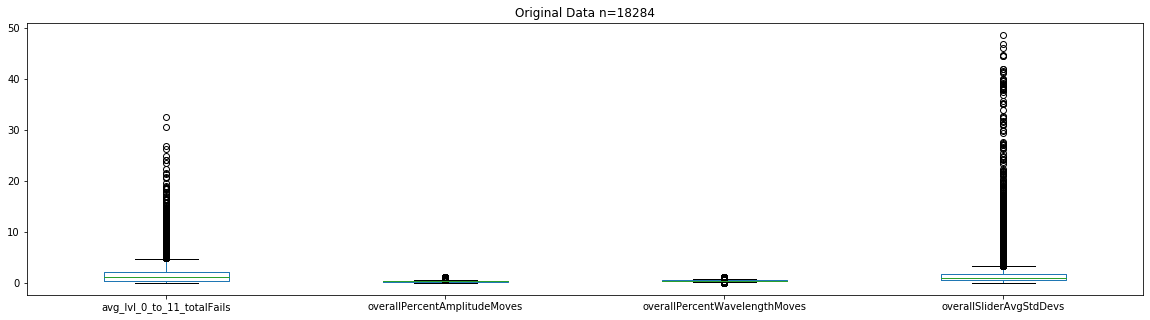

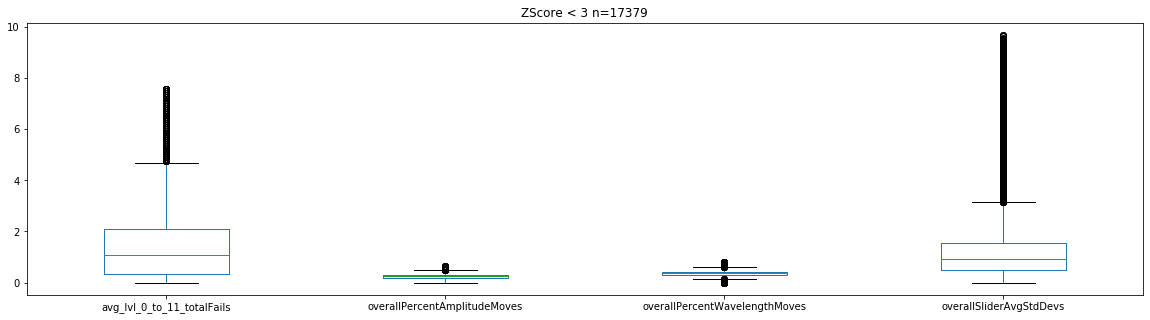

In [32]:
if not options:
    final_df, outlier_meta = cu.reduce_outliers(reduced_df, 3)
else:
    final_df, outlier_meta = cu.reduce_outliers(reduced_df, options.zthresh)
final_meta = import_meta + filter_meta + new_feat_meta + aggregate_meta + reduced_meta + outlier_meta
print(*final_meta, sep='\n')

In [33]:
cu.print_options(final_meta)

options('GAME',
	'NAME',
	{'query_list': [], 'one_query': False, 'fillna': 0, 'verbose': False},
	{'verbose': False},
	['closenessR2', 'rangeIntercept', 'totalFails'],
	range(0, 12),
	['avg_lvl_0_to_11_totalFails', 'overallPercentAmplitudeMoves', 'overallPercentWavelengthMoves', 'overallSliderAvgStdDevs'],
	3,
	[]
)
